In [16]:
%run Dataloader.ipynb

otto-group-product-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters = 16)
kmeans.fit(train_x)
y_kmeans = kmeans.predict(train_x)

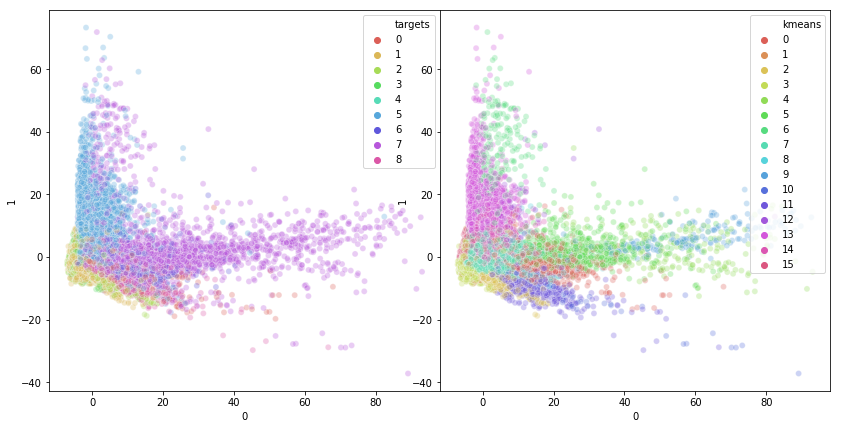

In [18]:
pca = PCA(n_components = 2)
X_items = pca.fit_transform(train_x)
df = pd.DataFrame(X_items)
df['targets'] = train_y.values
df['kmeans'] = y_kmeans

items = ['targets', 'kmeans']

fig, axes = plt.subplots(1,2, figsize = (14,7))
fig.subplots_adjust(hspace=0,wspace=0)

for i, ax in enumerate(axes):
    no_cp = len(np.unique(df[items[i]]))
    sns.scatterplot(
        x=0, y=1,
        hue=items[i],
        data=df,
        legend="full",
        palette=sns.color_palette("hls", no_cp),
        alpha=0.3,
        ax = ax)

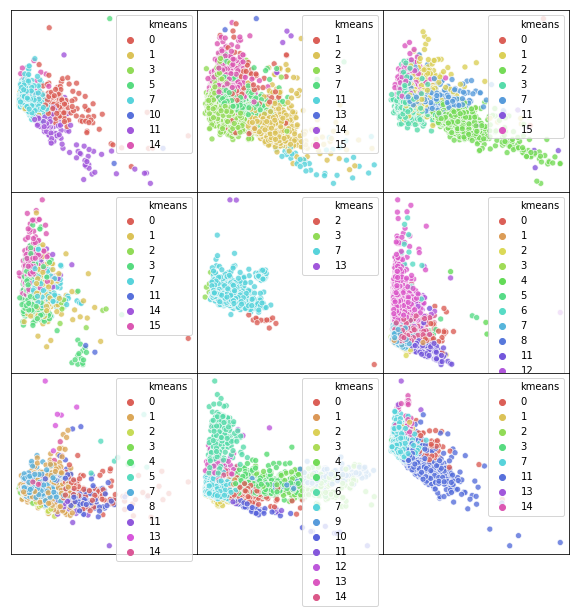

In [19]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
fig.subplots_adjust(hspace=0,wspace=0)

for i, ax in enumerate(axes.flat):
    
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    data = df[df['targets'] == i]
    no_cp = len(np.unique(data['kmeans']))
    sns.scatterplot(x=0, y=1,
                         data=data,
                         hue = 'kmeans',
                         legend="full",alpha=0.8, color = 'k',
                          palette = sns.color_palette("hls", no_cp),
                           ax = ax)

In [20]:
#Pickle train df
df.to_pickle('./PCA_Kmeans16_train.pkl')

#Pickle val df
X_val_pca = pca.fit_transform(val_x)
df = pd.DataFrame(X_val_pca)
df['targets'] = val_y.values
df['kmeans'] = kmeans.predict(val_x)
df.to_pickle('./PCA_Kmeans16_val.pkl')

